In [2]:
import pandas as pd

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
data = pd.read_csv('/content/test.csv')

In [8]:
data

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,BBAE9K7BXFUTDNBK,9.0,2015-08-15 21:17:17.000,58,Davion,Yes,Pet_care,0,39,0,117.0,5.0,3094.0,4674
3426,RTRDYPA4PJHCJCGF,30.0,2015-12-04 01:51:47.000,358,Maiah,Yes,Technology,3,17,0,509.0,6.0,3384.0,14105
3427,TUNE8FWQBS7TVVT7,14.0,2016-03-28 20:55:47.000,106,Gwendolen,Yes,Educational,0,36,0,150.0,17.0,710.0,10894
3428,NKCEGMUABCRGUZPE,1.0,2015-05-23 07:41:36.000,104,Addilynn,Yes,Child_care,0,63,0,325.0,15.0,1477.0,5165


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        3430 non-null   object 
 1   Stall_no          3429 non-null   float64
 2   instock_date      3430 non-null   object 
 3   Market_Category   3430 non-null   int64  
 4   Customer_name     3377 non-null   object 
 5   Loyalty_customer  3430 non-null   object 
 6   Product_Category  3430 non-null   object 
 7   Grade             3430 non-null   int64  
 8   Demand            3430 non-null   int64  
 9   Discount_avail    3430 non-null   int64  
 10  charges_1         3394 non-null   float64
 11  charges_2 (%)     3425 non-null   float64
 12  Minimum_price     3416 non-null   float64
 13  Maximum_price     3430 non-null   int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 375.3+ KB


In [19]:
selected_features = ['Market_Category', 'Product_Category', 'Grade', 'Demand', 'Discount_avail', 'charges_1', 'Minimum_price', 'Maximum_price']

In [21]:
X = data[selected_features]
y = data['charges_2 (%)']
X,y

(      Market_Category Product_Category  Grade  Demand  Discount_avail  \
 0                 205          Fashion      0      90               0   
 1                   3          Fashion      0      87               0   
 2                 183       Technology      2      55               0   
 3                 358       Child_care      3      86               0   
 4                 167       Technology      0      27               0   
 ...               ...              ...    ...     ...             ...   
 3425               58         Pet_care      0      39               0   
 3426              358       Technology      3      17               0   
 3427              106      Educational      0      36               0   
 3428              104       Child_care      0      63               0   
 3429              165           Repair      0      92               1   
 
       charges_1  Minimum_price  Maximum_price  
 0         380.0         2576.0           3340  
 1         3

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
data = pd.read_csv('/content/test.csv')
data.dropna(inplace=True)
model = LinearRegression()
X

X = data[['Discount_avail', 'charges_1', 'charges_2 (%)','Minimum_price','Maximum_price']].astype(float)

y= data[['charges_2 (%)']].astype(float)
model.fit(X,y)
print(model.coef_)
print(model.intercept_)

[[-3.10276256e-15  2.48932819e-16  1.00000000e+00  5.58364119e-17
  -3.08997619e-17]]
[-1.24344979e-14]


In [23]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X)

rmse = mean_squared_error(y, y_pred, squared=False)
print(rmse)

8.94574157121608e-14


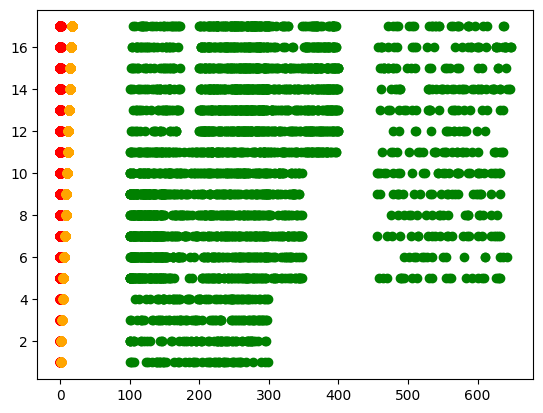

In [25]:
import matplotlib.pyplot as plt

plt.scatter(data['Discount_avail'], data['charges_2 (%)'], color='red')
plt.scatter(data['charges_1'], data['charges_2 (%)'], color='green')
plt.scatter(data['charges_2 (%)'], data['charges_2 (%)'], color='orange')
plt.show()